In [1]:
import os
import sys
sys.path.append("../../")
import pandas as pd
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
# reload(visualization)

<module 'visualization' from '../..\\visualization.py'>

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/li_niu_ping/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\li_niu_ping"
wind_turbine = "1"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)
feature = feature.loc[speed.index]
toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (1245, 75)
speed.shape: (1245, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

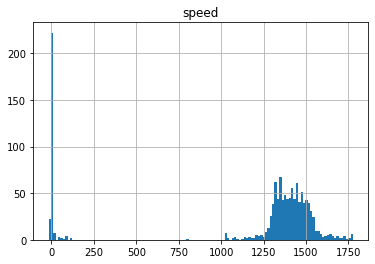

In [5]:
speed.hist(bins=128)

feature.shape: (982, 75)
speed.shape: (982, 1)


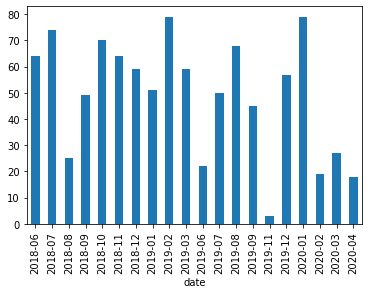

In [6]:
speed_threshold = 250
feature = feature[speed.speed >= speed_threshold]
speed = speed[speed.speed >= speed_threshold]

toolkit.print_shape(feature=feature, speed=speed)
feature = pd.concat([feature, speed], axis=1)
visualization.data_distribution(feature)

In [7]:
toolkit.tuning_pca(feature, 8)

pca.components_.shape: (8, 76), sum(pca.explained_variance_ratio_): 0.9943


In [8]:
# 划分train set, test set
train_start = "2018-06"
train_end = "2019-08"

test_start = "2019-09"
test_end = "2020"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (734, 76)
feature_test.shape: (248, 76)


In [9]:
feature_test = feature
# speed_test = speed

In [10]:
detector = model_entry.OutlierDetector()

In [11]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











In [ ]:
detector.decision_scores.plot()

In [15]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

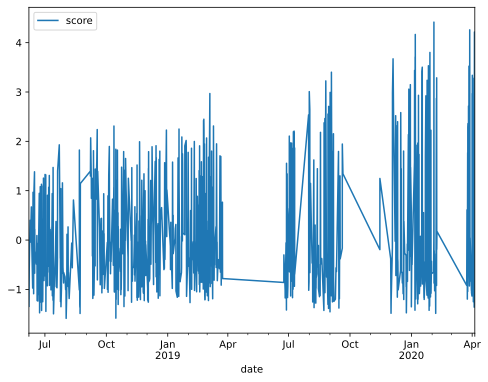

In [16]:
anomaly_scores.plot()

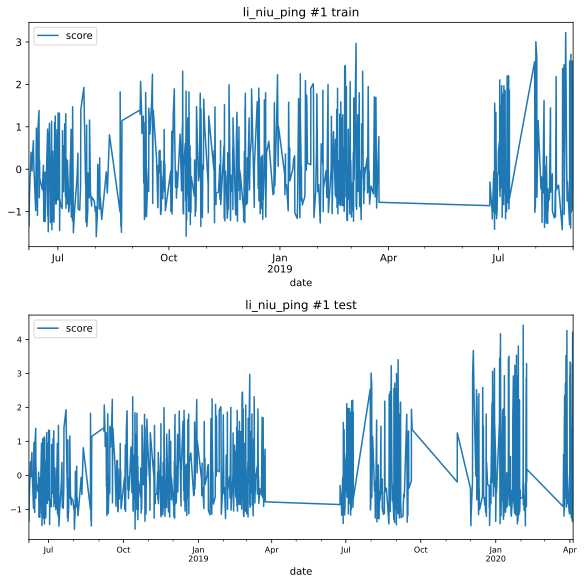

In [51]:
reload(visualization)
fig, ax = visualization.plot_line(detector.decision_scores, anomaly_scores, "li_niu_ping", wind_turbine)

In [39]:
ax[0].title.fontsize = 0.1

In [41]:
ax[0]

<AxesSubplot:title={'center':'li_niu_ping #1 train'}, xlabel='date'>

In [33]:
ax

array([<AxesSubplot:title={'center':'li_niu_ping #1 train'}, xlabel='date'>,
       <AxesSubplot:title={'center':'li_niu_ping #1 test'}, xlabel='date'>],
      dtype=object)

In [18]:
anomaly_scores[anomaly_scores.score > 4]

,score
date,
2020-01-06 19:00,4.166049
2020-02-03 17:00,4.415755
2020-03-28 08:00,4.259591
2020-04-04 10:00,4.215607
